# Video 1: Bayesian Regression Concept

### Question 1: What are the main objectives for data scientist to use Bayesian regression?

In this module, we will learn a cool concept called Bayesian regression. Regression is central to the practice of statistics. It is part of the core knowledge expected to apply for any statistician and data scientist because most of us are curious about explaining the relationships. We wanna understand for example whether we spend more time used to study will lead to a better exam result or mastery of knowledge. And we also want to know how strongly the time spent on study affects learning outcome. In short, we want to find a relationship between factors and the outcome.

### Question 2: What are the major components of Bayesian regression models?

I'll give you a quick snapshot of Bayesian regression framework including some of the assumptions we are going to need and then we'll talk about how to attack regression problem using the Bayesian framework. So what are the components of Bayesian regression models? Every time we look at a dataset we get multiple features in it. Let's consider the following research question: **What makes a popular Ted Talk?** Apparently there are several factors we might imagine contributing to the popularity of TED Talks. They could be the nunber positive ratings received, the length of the talk, who the speaker is, the title of the talk, or even a number of speakers invited to the talk. How do these factors **independent variables**, or predictive features. And obvious, our goal is find out the relationship of them to the popularity of Ted Talks, so the popularity of Ted Talk (let's say the number of views the Ted Talk) is defined the **dependent variable** of the regression model.


### Question 3: Why do we want to use the Bayesian methodologies in regression analysis?

![](assets/bayes_rule.png)

What is the biggest motivations of using Bayesian methodologies for regression analysis is that it's really flexible. In Bayesian regression, the probabilities can be based on degree of belief. Our prior is a guess of the model parameters over the independent variables based on expert knowledge. Maybe you know something about a problem. Maybe you had some previous information that we are not going to be collecting for now but you do want to use them in the model. After all, we want to update the belief with new information (like a dataset) in a very nice manner, determining what model we choose, we want to solve problems with different natures, and that other statistical methods might be difficult to approach. 

Following the Bayes' rule taken from course 1, the graph shows that instead of just training on the data, we do include more source of information can we choose the Bayesian methods. And all prior, likelihood and posterior in Bayesian regression they're all going to be represented in probability distributions, (**revise**) so the model is showing richer information that you can take out from the analysis that otherwise we won't understand.

The probabilistic programming package PyMC3 offers really easy tools to build Bayesian regression models. Similar to updating probability distributions in week one, PyMC3 also use Markov Chain Monte Carlo simulations to return the best prediction distribution for each predictive features. I'm going to end right here. Only the last minute emphasis! In this specialization, I'll definitely not provide ideas and research questions that dive into **spurious relationships**. For instance, I won't teach the modeling to find out the relationship between average chocolate consumption by country and the number of Nobel laureates in that country. Now that we have discussed some general ideas about regression. I'll see you in the next video!

# Video 2: Regression Sampling Process

Now that we have discussed some general ideas about Bayesian regression. Let's begin to learn how we can build linear regression models. Now take a look about the sampling process of regression models.

### Question 2: What assumptions should the data meet in order to perform Bayesian regression? 

First of all to estimate a regression model, we should specify a probability distribution for the data (let's say y1, y2, until yn are the outcome data) such as normal, Poisson, binomial. The Bayesian approach necessitates us to specify the prior distributions of not only the parameters, but also a homoscedastic error term, which is a constant variability of each outcome.

In this case we are doing a linear regression. We have two main assumptions as we'll find out the best values of **regression coefficients** to adapt models to predict TED Talk view. The Bayesian linear regression models of Ted talk views have an expression form as follows: 

* **views ~ Normal(intercept + predictors * regression coefficients, standard deviation)**

To make things clear, the dependent variable views it's assumed to be distributed as normal distribution. The meaning of which is a linear combination of regression coefficient time is the predictors plus the intercept, and the standard deviation is a positive number that represents how great the variability of expected TED Talk view is going to have. (**revise**)

### Question 3: How to implement Bayesian regression using the PyMC3 package?

In [1]:
# So let's come back to the question. What makes a popular Ted Talk?

# Let's start with bringing in the pymc3
import pymc3 as pm
# and Arviz package
import arviz as az

# and a couple of regular data science packages for our analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# We start by importing the Ted talk dataset using the pd.read_csv function 
ted_talk = pd.read_csv('assets/ted_main.csv')
# and have a sneak peek on the header of the data.
ted_talk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [2]:
# It's also a great practice to understand how large the data that we are going to analyze because the 
# larger sample size of the data we'll expect that the data likelihood can actually overwhelm the prior
# so that our result will base more on the data, our evidence. So let's 
# find out the size of our data
ted_talk.shape

# Cool!

(2550, 17)

So, our DataFrame contains a total of 2550 rows, and 17 variables where each row contains data record of a particular Ted talk. It's really kind of rich data. We have 17 variables regarding the following features:

* **comments**: number first level comment made on the talk
* **description**: a blurb of what the talk is about
* **duration**: the duration of the talk in seconds
* **event**: the location where the Ted talk took place
* **film_date**: the Unix timestamp of the filming date. The Unix timestamp is a way of storing specific dates and times for website builders. It's useful because it represents all time zones at once. Technically it does not change no the matter where you are at on the globe.
* **languages**: the number of languages in which the talk is available
* **main_speaker**: the main speaker of the talk
* **name**: the official title of the talk
* **num_speaker**: the number of speakers in the talk
* **published_date**: the Unix timestamp that the Ted title was published on TED.com; so again it's a timestamp to allow TED.com to keep track on when a talk is published to its platform
* **ratings**: a dictionary of various ratings given to the talk
* **related_talks**: a list of recommended talks to watch next
* **speaker_occupation**: the occupation of the main speaker
* **tags**: the themes associated with the talk
* **title**: the title of the talk
* **url**: the URL of the talk
* **views**: the number of views on the talk.

Cool! It's seems like a long list of columns. Do we need all these features to understand what factors are contributing to the popularity of Ted talks? Not really! So let's first do a little visual inspection of the the attributes we are interested in.

In [3]:
# Pre-processing is optional

# Choose columns: Only keeping the variables to be used in the analysis
ted_talk = ted_talk[["comments","duration","languages","main_speaker","num_speaker",
                    "published_date","ratings","speaker_occupation","tags","views","title"]]

# Since we found the published date of Ted talks are coded with Unix timestamp, and the timestamps 
# is coded with unit second, we can transform those timestamps into readable dates by passing the 
# timestamps and specifying unit as second to the pd.to_datetime function. It's useful very often 
# to convert different time formats
ted_talk['published_date'] = pd.to_datetime(ted_talk['published_date'], unit='s')

# To simplify the interpretation of video views, I also broadcast the entire columns by dividing the 
# quantity by 1 million, so now the views are represented by a unit of million.
ted_talk['views'] = ted_talk['views'] / 1000000

# It also sounds better to convert the video duration from seconds to minutes by dividing 
# the duration by 60.
ted_talk['duration'] = ted_talk['duration'] / 60

# Now let's take a glimpse at the data set again.
ted_talk.head()

# The duration, and the views columns now look easier to interpret! In the future it's not necessary 
# to do that but it's good to keep in mind that broadcasting is a convenient way to clean a dataset.

,comments,duration,languages,main_speaker,num_speaker,published_date,ratings,speaker_occupation,tags,views,title
0,4553,19.400000,60,Ken Robinson,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",47.227110,Do schools kill creativity?
1,265,16.283333,43,Al Gore,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",3.200520,Averting the climate crisis
2,124,21.433333,26,David Pogue,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",1.636292,Simplicity sells
3,200,18.600000,35,Majora Carter,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",1.697550,Greening the ghetto
4,593,19.833333,48,Hans Rosling,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",12.005869,The best stats you've ever seen


In [4]:
ted_talk.tail()

,comments,duration,languages,main_speaker,num_speaker,published_date,ratings,speaker_occupation,tags,views,title
2545,17,7.933333,4,Duarte Geraldino,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",Journalist,"['TED Residency', 'United States', 'community'...",0.450430,What we're missing in the debate about immigra...
2546,6,4.833333,3,Armando Azua-Bustos,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",0.417470,The most Martian place on Earth
2547,10,10.850000,1,Radhika Nagpal,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",0.375647,What intelligent machines can learn from a sch...
2548,32,18.333333,1,Theo E.J. Wilson,1,2017-09-21 20:00:42,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",0.419309,A black man goes undercover in the alt-right
2549,8,8.650000,1,Karoliina Korppoo,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...",Game designer,"['cities', 'design', 'future', 'infrastructure...",0.391721,How a video game might help us build better ci...


Up till now we've pre-processed the data. Well let's simplify our research question a bit for our tutorial purpose. **Can we predict the popularity of the talk (i.e. the views of a talk) if we know the length of video, how many languages involved, and the amount of comments following to talk?** Which of these factors significantly contribute to the popularity of Ted talks?

In [5]:
# Let's start off by creating a context manager called pm.Model() and contextualizing the model 
# name as ted_view_regression, so we know we are feeding a regression model on the Ted talk views.
with pm.Model() as ted_view_regression:
    
    # The first step we start is specifying priors distribution. Because the goal of performing a regression model is 
    # to find out how large the effect is for each predictor associated with the increase of Ted talk views.
    
    # The first parameter we need is the initial effect. We ask a question: how popular would the talk be
    # if there were a hypothesized talk without any comment[# comment = 0], without any transcription 
    # of language[# languages = 0], and with zero length[# duration = 0]? 
    
    # Most of the time we do not know exactly the value of intercepts, when we set a prior for it, it's 
    # reasonable to make a generic choice. We can use a very wide normal prior by setting the value of
    # standard deviation large. We can't have negative views, so it seems a reasonable number.
    # We make use of the idea that the average view of TED talk hovering around
    # 5 millions, so we start with a mean of 5 million and sigma of 3 million. At the end of the day,
    # I've little faith of this intercept to be 5 million, sd 
    intercept = pm.Normal("Intercept", mu = 5, sd = 3)

    # Regression coefficients:
    # Now let's make educated guesses: based on our prior knowledge, how much popularity will 
    # a video gain if the talk is one minute longer?
    # Hypothesize postive effect on the views when increasing each of duration, languages and comments.
    beta_duration = pm.Normal('duration', mu = 0.05, sd = 0.3)
    # How much popularity will a video gain if the talk offers one more language transcription?
    beta_languages = pm.Normal('languages', mu = 0.05, sd = 0.1)
    # By how much does an increase of video comment affect the Ted talk popularity? 
    beta_comments = pm.Normal('comments', mu = 0.05, sd = 0.1)
    
    # Error Term:
    # One assumption necessary to satisfy in order to predict the relationship between these predictors 
    # and the popularity is that it requires us to define a homoscedastic variability of our model.
    # The variance has to be a positive number, because of this, distributions such as half normal 
    # and half Cauchy focus only on the positive side of the normal or Cauchy distributions respectively.
    # 
    epsilon = pm.HalfCauchy('epsilon', 5)

    # Expected value: View ~ duration, languages, comments
    # expected_value = pm.Deterministic("expected_value", intercept + beta_duration * ted_talk['duration'])
    # + beta_languages * ted_talk['languages'] + beta_comments * ted_talk['comments']
    
    # Specify likelihood

    # How about the likelihood? That's where our data comes into play! So what we're coming up here is 
    # the popularity of a 2550 TED Talks, and an appropriate distribution to model the number of views.
    # This is kind in probabilistic programming as you experiment on different distributions and make 
    # comparisons until you discover a suitable distribution. It's quite subjective, but at the end 
    # of the day, as you'll be able to tell the shape of each distribution, it becomes more
    # straightforward to process of defining likelihood.

    # In this case, we measure the number of TED talk views. It's a continuous data with positive 
    # number and it could go up to infinity. We can model this phenomenon using the normal distribution.
    # We use the pm.Normal function to pass through the name of the variable - we just call it likelihood,
    # and then notice, second parameter is the expected predictive value of views, which is of the form
    # intercept + the coefficient for video duration times video duration + the coefficient for languages
    # times the number of languages offer in a video + the coefficient for comments times the number 
    # of comments under the video. Oh it's nothing more than an hour programming language, specifying 
    # the linear relationship of predictors (independent variables) to the outcome, which is the 
    # number of views.

    # In the third parameter we pass epsilon, which is the variability of the model, and most importantly
    # we need to provide the actual number of views as observed finish specifying the likelihood.

    likelihood = pm.Normal('likelihood', mu = intercept + beta_duration * ted_talk['duration'] + beta_languages * ted_talk['languages'] + beta_comments * ted_talk['comments'], sd = epsilon, observed = ted_talk['views'])
    # The dependent variable was too large such that the PyMC3 model failed to run for several attempts.

    # We finally reached the sampling step. This time let's draw more samples for each simulation. 
    # Let's return 4,000 samples for each simulation, each with 2,000 initial samples discarded 
    # before the model starts to return sample values. This time I still recruit three groups of samples.
    trace = pm.sample(4000, tune = 2000, chains = 3)

<ipython-input-5-3c5be7f7870f>:70: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(4000, tune = 2000, chains = 3)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [epsilon, comments, languages, duration, Intercept]


Sampling 3 chains for 2_000 tune and 4_000 draw iterations (6_000 + 12_000 draws total) took 23 seconds.


In [6]:
# Clean code:
with pm.Model() as ted_view_regression:
    intercept = pm.Normal("Intercept", 5, sigma=3)
    beta_duration = pm.Normal('duration', mu = 0.05, sd = 0.3) 
    beta_languages = pm.Normal('languages', mu = 0.05, sd = 0.1) 
    beta_comments = pm.Normal('comments', mu = 0.05, sd = 0.1)
    epsilon = pm.HalfCauchy('epsilon', 5)

    likelihood = pm.Normal('likelihood', mu = intercept + beta_duration * ted_talk['duration'] + beta_languages * ted_talk['languages'] + beta_comments * ted_talk['comments'], sd = epsilon, observed = ted_talk['views'])
    trace = pm.sample(4000, tune = 2000, chains = 3)

<ipython-input-6-31795a02d6a3>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(4000, tune = 2000, chains = 3)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [epsilon, comments, languages, duration, Intercept]


Sampling 3 chains for 2_000 tune and 4_000 draw iterations (6_000 + 12_000 draws total) took 21 seconds.


During the sampling process you can take a coffee break. 
Okay! Now you've created the first Bayesian linear regression model and the model took around three minutes to sample numerically the posterior distribution. This sampling process says sampling 3 chains for 2000 tune and 4000 draw iterations. We say we recruit three independent groups of Ted talks, each with 2000 + 4000 talks in quantity and only the last 4000 talks are returneed as sampling. Each chain actually represents a simulation, a different world of TED talk samples, and our model returns three simulated results in total.

In [7]:
# Before reaching to the posterior statistics let's look at what's the predicted value of Ted talk views 
# given our model. In order to compare the true and predicted value of views, we should create an array 
# called like predicted and it's computed as the summation of all regression
# coefficients times all independent variables plus the intercept.
predicted = trace['Intercept'].mean() * np.repeat(1, len(ted_talk['duration'])) + trace['duration'].mean() * ted_talk['duration'] + trace['languages'].mean() * ted_talk['languages'] + trace['comments'].mean() * ted_talk['comments']
# Compare the predicted value come from the model against the true views directly got from the data.
pd.DataFrame({"true": ted_talk['views'], "predicted": predicted})

# As you can see from this Data frame, if the actual views of a talk is high, the regression model tends 
# to return a larger expected views as outcome, and the vice versa is true. 
# So we claimed that the regression model can explain 
# partial variability of the observed views given the duration of videos, the number of possible languages, add the 
# number of audience comments. But there are some variability unexplained. Substantial predicted errors 
# exist in cases when the true value goes higher than 20. 
# It is evident because in row 5, a 20.68 million view talk is predicted to have 4.3 million views. 
# It might be because this video indeed belong to unnaturally high views talks, but we are 
# uncertain about the reason whether there might be time-series patterns associated with the Ted talk 
# views or not. 

,true,predicted
0,47.227110,21.048785
1,3.200520,3.086177
2,1.636292,1.533711
3,1.697550,2.358291
4,12.005869,4.786035
...,...,...
2545,0.450430,-0.671409
2546,0.417470,-0.856171
2547,0.375647,-0.826586
2548,0.419309,-0.558372


Let's draw another regression plot that can shed light on how strong the linear relationship can describe the predicted views and the actual views from data. 

[Text(0.5, 0, 'predicted views'), Text(0, 0.5, 'actual views')]

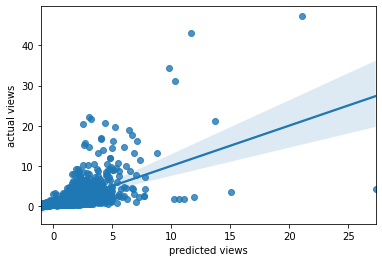

In [8]:
# We can draw that regression plot using sns.regplot, and passing just the same inputs as a scatterplot.

sns.regplot(x = predicted, y = ted_talk['views']).set(xlabel = "predicted views", ylabel = "actual views")
# Although regression model could be powerful, we still found many cases where the predicted views are 
# either significantly larger or smaller than the actual number. 
# If the actual video views were well-predicted, then the graph would look as if the dots are very closed
# to the regression line, and the bars with lighter blue color would not expand as predicted views 
# increase. Now as the predicted views increase, the model is less confident about the precision of
# the estimated views. The uncertainty is quite understandable. One possible way to speak with that
# is with more interactions (given by the number of comments) and potentially wider audience (given 
# by a large number of available languages), we become progressively harder to predict exactly how 
# many audience would eventially watch the Ted talk, thus representing the model estimate with wider
# error bars. But anyway, the linear aggression can partially 
# explain the overall variability of actual views because the positive direction of prediction 
# versus the actual views is accurate.

# As a practice, I encourage you to look into negative predicted view cases, and then rerun the model
# with different priors and with other predictors that you believe important. Let's try coding yourself!

In this video, we've demonstrated how to run a Bayesian linear regression using PyMC3. In any case, after seeing a few negative results in the predicted outcome, you could consider that one big improvement of the regression model you see in this tutorial can be fulfilled if we can ensure that the predictive video views are all positive because none of the video should have negative views. Now we are uncertain about how power of this model does, so let's move on to the next video where we'll conduct some posterior diagnostics.

# Video 3: Regression: Posterior Statistics

Anytime we build Bayesian models, we need to derive a posterior distribution. This contains all necessary information that we're interested about our parameters according to the data and a model and is chiefly the purpose of training data and using PyMC3 algorithms for sampling. 

### Question 1: Why are posterior statistics important for Bayesian analysis?

Coming back to the definition, posterior distribution represents the updated belief after taking in new evidence. In other words, it combines both our entire prior knowledge represented as prior distribution and new evidence that is used to specify the observed option as likelihood. Remember that the purpose of conducting Bayesian analysis overall is accumulating knowledge and updating beliefs. Each time the posterior statistics perspective characterizes our updated belief when new data is available, so that posterior can be reused for next round of modeling if we think of the infinite, automatic modeling process called **chaining Bayes' rules**. 

Nowaday we're interested in continuous deployment and integration, if you're familiar with these techniques in big data, this typically resembles leveraging the posterior distribution as the characteristics or configurations of the next deployment. Simply put, posterior statistics help us interpret experimental results by providing rich inference, and it helps us move on to the next experiment. 

### Question 2: What are some posterior statistics that we are necessary to gain actionable insights?

Now we've obtained a trace object and this is the output results generated from MCMC sampling using `pm.sample()` and the data type of which is a MultiTrace, a special data type storing the posterior values as well as the trajectory.

The first step after sampling the Bayesian regression model is to inspect the posterior probability distributions for each individual parameter in the model given the trace object.

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'languages'}>],
       [<AxesSubplot:title={'center':'comments'}>,
        <AxesSubplot:title={'center':'epsilon'}>, <AxesSubplot:>]],
      dtype=object)

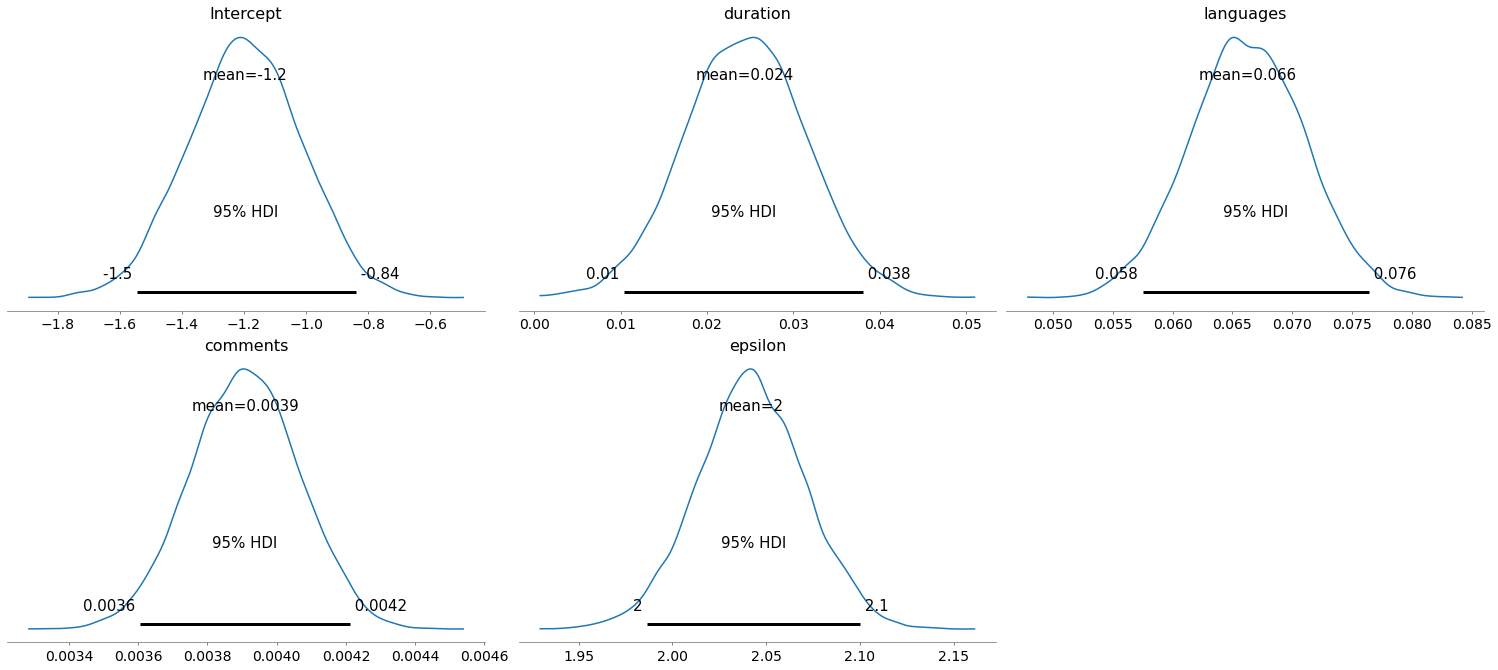

In [9]:
# The easiest way to summarize the posterior distribution of each variable is to use the plot_posterior function in 
# Arviz. This function accepts a PyMC3 trace object as the main argument, with the hdi_prob option 
# allowing users to specify the user-defined highest posterior density level. In this example I want to set 
# it as 0.95 to return the 95% posterior plot of the initial effect called intercept, 
# and regression effects including duration, languages, comments, and the error term epsilon.
az.plot_posterior(trace, hdi_prob = 0.95)

# Cool! You can see five plot graphs, all of which is called the highest posterior density plots.
# The Arviz package runs the kernel density estimation (check week 4 in course 1) for continuous variables.
# It shows the credible parameters together with the mean of the distribution and show the 95% highest
# posterior density as a thick black line at the bottom of each plot. 

# To recap, the posterior density plot is just a typical kdeplot except that it allows 
# us to visualize where does more posterior samples tend to hover and where you'll hardly see any posterior 
# samples.

Based on the graph, we can make posterior-based interpretations as the following: 

* 1) if a talk is longer, it tends to attract more views. A minute longer of the video length increases the predicted number of views by 0.024 million, or 24 thousands. 
* 2) for each extra language in which the talk is available, it tends to increase 0.066 million video views, or 66,000 views.
* 3) A video is more popular if there are more comments and reviews. Each single extra comment or review will attract  0.0039 million more views in a Ted talk, which is about 4000.
* 4) Although we can't have videos which is 0 length, no available language and no comments at all, the baseline video view is -1.2 million, which is reasonable because each video should interact with different languages to approach certain audience for instance.
* 5) the constant variance for the expected number of views is approximately 2 million.

array([[<AxesSubplot:ylabel='languages'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='duration', ylabel='comments'>,
        <AxesSubplot:xlabel='languages'>]], dtype=object)

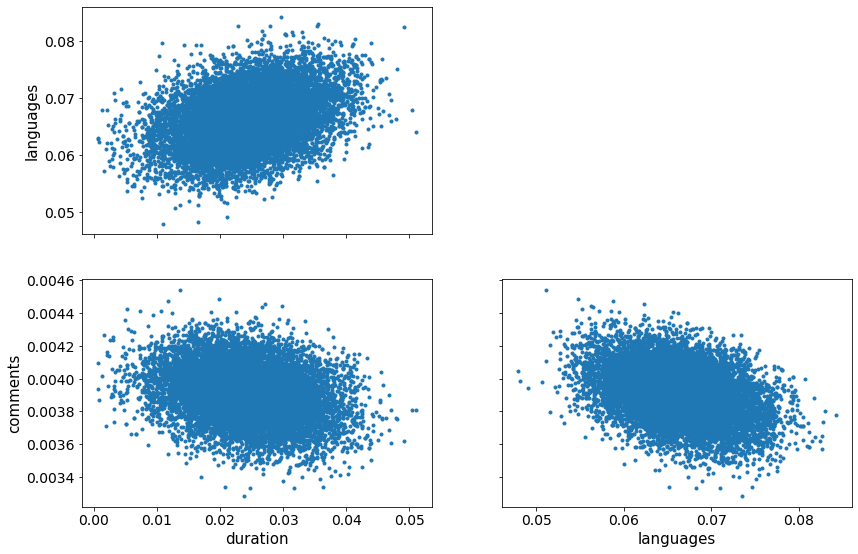

In [25]:
# Question 3: How to find out the relationship between predictors?

# The second step of posterior diagnostic is to inspect correlations between parameters.
# The Arviz package allows you to visualize the pairwise correlation among all variables provided by passing
# a list of variables to the az.plot_pair function.

az.plot_pair(trace, var_names = ['duration', 'languages', 'comments'])

# Cool! We drew 3 pair plots together to demonstrate the linear relationship among three predictors.
# You can see that pair plots in Arviz allow us to see the relationships between two variables.


* The pairplots from the first row show that video duration effect and language effect are positively correlated, showing that a video with higher language effect can attract relatively more views with each minute increase in video length. Of course, such correlation does not imply causation, that is, it does not prove that a larger effect of language on Ted talk views causes the increase in duration effect. In regression, we call this positive relationship the synergy effect, where the increased effect in duration leads to a higher effect when more languages are provided for a Ted talk.

* The pairplots from the first row show that video comment effect negatively correlates with both the duration and language effect. It seems that a video attracting relatively more people due to video comments tends to attract relatively less people by the video length and available languages conditions. What does that mean? It suggests that the effect of more interactions on comments and audience coverage due to languages available, and video length conditions on video views may be competing with each other. Statistically it's called a moderation effect, where the increased effect in video comments leads to a lowered, moderated effect on remaining two variables. 

* It is worth notice that strong posterior correlations between any pair of parameters can indicate that the model is more complex than it needs to be (e.g. summing multiple variables is needed, or transforming variables is needed). From these graphs we can consider the correlations are weak because the blue dots (data points) are quite dispersed. So we can conclude that we don't need to perform transformations in order to derive good posterior fits.

Long story short, these pair plots are great visualizations to identify trends that help explain the interaction between multiple variables

<AxesSubplot:ylabel='Density'>

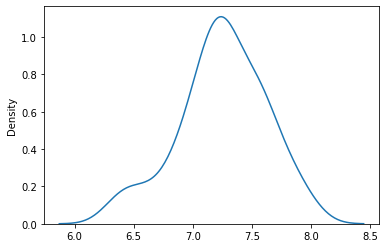

In [36]:
# Finally, let's envision how many views will a typical three languages, 15 minutes videos with 300 comments be? 
# We often ask these "what if" scenarios, and the way of understanding the approximate number of views could 
# be just adding the linear combination of regression coefficients and the parameter value in that scenario.
# We can first import the random module.
import random

# There are many ways could we predict Ted talk views and I'm using the random sampling methods. For each
# of the variables - intercept, duration, languages, and comments, I sampled 100 values from the trace object
# because I want the variability inside each variable can be minimized.
intercept = random.choices(trace['Intercept'], k = 100)
# And I multiplied the trace values of duration by 15
duration = np.multiply(random.choices(trace['duration'], k = 100), 15)
# the trace values of languages by 3
languages = np.multiply(random.choices(trace['languages'], k = 100), 3)
# and the trace values of comments by 300
comments = np.multiply(random.choices(trace['comments'], k = 100), 2000)
# Cool! Now we can visualize how much views will this video get!
sns.kdeplot(intercept + duration + languages + comments)

# From this linear regression formula we found that Ted talk videos with 3 languages, 15 minutes and 300 comments
# will most likely attract around 600,000 views, which is less than a third of an average video. 
# However, the uncertainty shown in the kdeplot also suggests that it's possible to predict such video with 
# 1 million views or less than 100,000 views, albeit the probability is significantly lower given the low density.

In this video, we've introduced how to use posterior plot, pair plots to demonstrate the posterior distribution using the posterior samples from the trace object. But most importantly, I hope you have a better understanding of how to leverage posterior statistics to vividly interpret modeling results to a variety of audience because communication and knowledge delivery are still the ultimate goal for a data scientist.

As you've seen in the last density plot, posterior inference not only helps ourselves understand how strong each TED talk features interact with views every time with new data comes in, but also helps others learn new knowledge and make predications. As a practice, I recommend you to try plugging different scenarios (e.g. a 20-minute video that've attracted 1000 comments) and see how the predicted views is sensitive to each video condition.

# Video 4: Regression: Traceplot

In this video, we'll zoom in the discussion of traceplot. Traceplot is a main diagnostic for MCMC simulation. 

A major question frequently asked about regression is that: are the data we choose sufficient to precisely identify the complex model involving multiple influences on the response - the Ted talk views. Are the estimates for the model robust to the changes in prior specification or the influence of particular data observations (e.g. videos that are mostly viewed or leastly viewed)? 

<ipython-input-16-400067df4798>:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'languages'}>,
        <AxesSubplot:title={'center':'languages'}>],
       [<AxesSubplot:title={'center':'comments'}>,
        <AxesSubplot:title={'center':'comments'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>]], dtype=object)

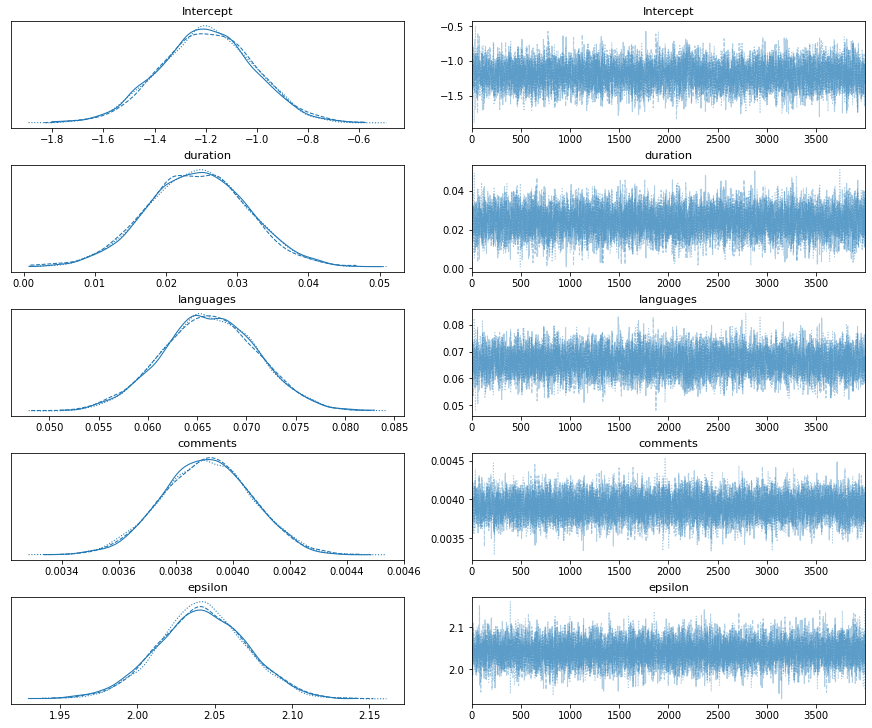

In [16]:
# We can make traceplots Bayesian inference provides a posterior diagnostic of traceplot on top of just a traditional best fitting line 
# attempting to minimize predictive errors. Using a traceplot we can analyze whole posterior distribution of likely parameters. 
# Lets plot the posterior distribution of our parameters and the individual samples we drew.

pm.traceplot(trace)

# Cool! We get two plots corresponding to one or more Markov chains for each variable. 
# So there are 5 * 2 subplots in total.

### Question 1: What are the major components of the traceplot?

There are two main visualizations given in the traceplot. On the left, we get a kdeplot that looks smooth except with several curves with different line types. It shows the posterior density given by the posterior samples so it shows the distribution of the posterior for each predictors, including the intercept.

The right hand side shows the trajectory of multiple Monte Carlo simulation with each chain. In normal cases, it should look somewhat similar to the white noise. 

### Question 2: How to infer convergence/divergence through traceplot?

On the right panel, the x-axis shows the number of samples in each trajectory and the y-axis shows the posterior sample values. We should not see any recognizable pattern because we want to have good agreement between these three chains, which indicates to us that the sampling process went smoothly. Nor do we want to see a curve going up or down because we want each chain converges to and meanders around a single value. In this case, the video duration effect meanders around 0.02 and looks quite similar to a white noise, so the variables are stable. If we pick a longer video, we are confident to say we'll gain 20,000 audience per minute increases in video length. We won't get weird regression results like we get 60,000, 70,000 or even 100,000 just because we need more samples.

On the left panel, among traces, we see that all five variables have similar traces for each curve. This is demonstrated when we can't observe a single trajectory running out of other trajectories. This shows that our model convergence is in a good shape - although different simulations are used from sampling process, the prediction remains steady. We won't be worried that we can't mix the chains and trust the posterior distribution we found. 

### Question 3: In what occasions will the posterior distribution of parameters look stable?

Although Bayesian models are more robust than most statistical methods, there might still be cases that outliers and influential observations (i.e. abnormal data points deviated from the main part of the sample) can dinimish the quality of posterior diagnostics. By saying robust, a model is considered to be robust if its output predictions are consistently accurate. This includes the case when one or more of the input data are drastically changed due to unforeseen circumstances such as measurement errors.

If the traceplot shows no special pattern, there's nothing we need to do in order to make our posterior looks stable. But if there is, I'd recommend you take the centered form of each independent variable and rerun the model. Research has found that correlations between regression parameters may be reduced if we transform each independent variable by taking the center term of them.

Long story short, we've seen a traceplot in a regression analysis which provides a visual way to inspect sampling behavior and assess mixing across chains and convergence. It's critical that we're able to tell if we need to write a new model or it's good to stay. Now, let's move on to the next diagnostic.

# Video 5: Regression: Effective Sample Size

In this video we'll continue to explore another important diagnostics about regression - effective sample size.

### Question 1: What does effective sample size help us understand the quality of Bayesian model?

Ideally, the effective sample size should be close to the actual sample size. One advantage of the NUTS sampler is that the most of my experience talking MCMC samplings, the effective sample size of NUTS is usually much higher than most other algorithms, such as Metropolis (in which binomial model is default to use). The effective sample size can help give a certain precision of the posterior estimates. For example

Too low sample size means that the model quality is bad. There's a very famous warning message typically point out the problem of low effective sample size during modeling. 

### Question 2: Why should the model contain decent proportion of effective sample size? 

- The effective size is essential to ensure that the model estimates, including posterior statistics like mode, mean and standard deviation are stable. Otherwise, if a certain parameter has low effective sample size, under my knowledge  the model estimate of that certain parameter might be unstable. The situation of unstable model estimate could exhibit in various forms, including most of the time it shows a long tail or long tails on both sides when low effective sample size occurs. Sometimes the scenario is even serious, where the posterior distribution may look flat, indicating that our updated belief does not show we are more knowledgeable because of the incoming data, when effective sample size goes near 0 or goes negative. In these cases, the posterior variance will be greater than usual. 


In [37]:
### Question 3: How to visualize effective sample size in PyMC3? 

# Since effective sample size for each parameter is important to determine if the model has a good convergence, 
# we can start with using the pm.summary() function to get the values in tabular form.

effective_sample_size = pm.summary(trace)

# Let's show the table 
effective_sample_size

# From the table, we can look at the ess_bulk value to understand how large the effective sample for each
# variable. We see that all Intercept, duration, languages, comments, and the constant error term has
# more than 5000 effective samples, which are significantly greater
# than 200, a critical threshold that indicates low effective sample size. 

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.196,0.183,-1.528,-0.850,0.003,0.002,5225.0,5258.0,1.0
duration,0.024,0.007,0.012,0.038,0.000,0.000,6317.0,6953.0,1.0
languages,0.066,0.005,0.058,0.076,0.000,0.000,5758.0,5527.0,1.0
comments,0.004,0.000,0.004,0.004,0.000,0.000,9123.0,6629.0,1.0
epsilon,2.042,0.029,1.989,2.098,0.000,0.000,9457.0,6756.0,1.0


/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'95.0% HDI'}>,
       <AxesSubplot:title={'center':'ess'}>], dtype=object)

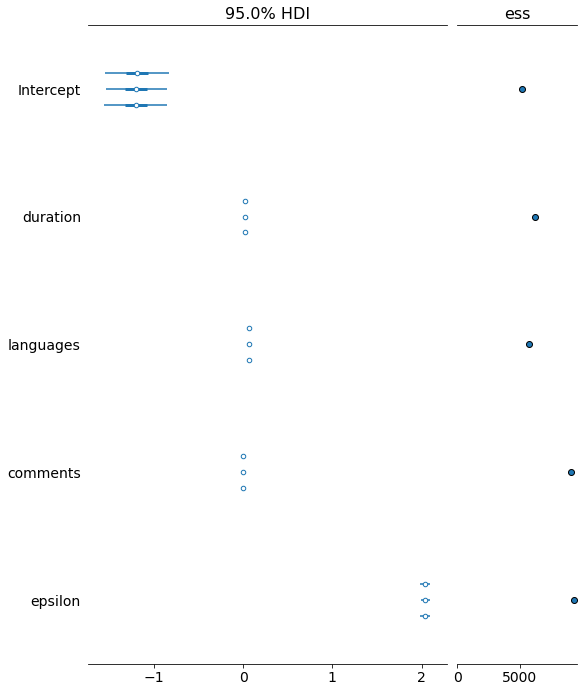

In [38]:
# We could indeed validate by looking at a correspondence of posterior plot and effective samples size.
# We can see such a plot by looking at the forest plot, passing through the trace object and set the 
# ess option to be True.
az.plot_forest(trace, ess = True, hdi_prob = 0.95)

# Cool! On the left panel of the forest plot we can see a horizontal representation of the 
# 95% highest posterior density interval. On the right panel we can see a blue dot showing the effective samples 
# for each variable. The effective sample size is larger than thousands each parameter indicates that 
# the estimation of the posterior distribution of each parameter is reliable and posterior variance is not high. 

# As a rule of thumb, Andrew Gelman and Osvaldo recommend that having effective samples size more than 1000 will
# be sufficient that we no longer need to worry about the tails and the posterior distribution should be
# informative since the spread of posterior distribution won't be unreasonably large.

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'95.0% HDI'}>,
       <AxesSubplot:title={'center':'ess'}>], dtype=object)

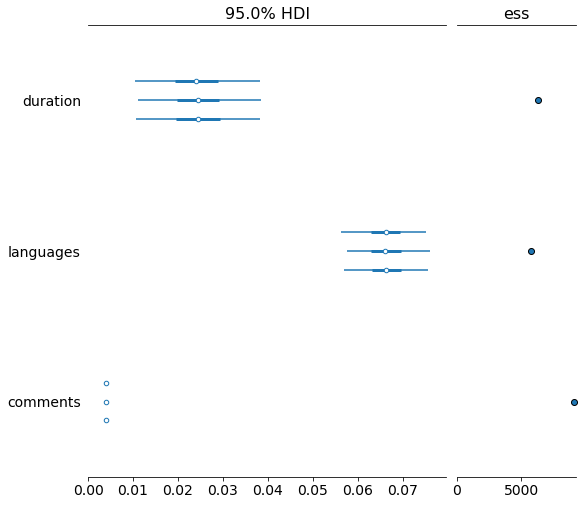

In [39]:
# Let's zoom in to only look at duration, language and comment effects. We specify the var_names option
# and provide a list to tell the program to show whatever variables I provide to the function.
az.plot_forest(trace, ess = True, var_names = ['duration', 'languages', 'comments'], hdi_prob = 0.95)

# From the left panel, we understand that the 95% highest posterior density interval of the three variables
# does not contain 0, which indicates longer video, a video with more languages and comments all significantly
# contribute to more Ted talk views. The forest plot suggests that the short interval might be the result of 
# high effective samples obtained from the posterior samples during sampling.

Cool! As an extra piece of knowledge, PyMC3 will return a warning message if the effective sample size of any variable goes lower than 200, so we might want to examine the model specification and re-run the model to increase the effective samples when we see the message. As a data scientist, we want the effective sample size to be close to the actual number of posterior samples, because we want the estimates that are reliable and consistent. 

In this video, we've discussed the importance of checking effective sample size for all regression coefficients. At the end of the day, you know it's important to ensure that every parameter in a Bayesian regression model should return a reasonable amount of effective samples so that the posterior estimates are reliable to interpret. Let's now move on the next diagnostic!

# Video 6: Regression: Highest Posterior Density

### Question 1: What does the highest posterior density use for?

In this video, we will learn deeper into a commonly used device to summarize the characteristics of posterior distributions - the highest posterior density method. First in this example, the posterior statistics shows the strength of intercept and three predictor's effects on Ted talk views. A major Bayesian approach of summarizing posterior statistics is through interpreting the credible interval of the posterior.

![](assets/highest_posterior_density.png)
The figure compares the 90% HDI and another credible interval that has 90% mass.

According to Hyndman (book in 1996), a highest posterior density is defined as the shortest interval on a posterior density for some given confidence level, such as 90%. A highest posterior density interval starts from the posterior mode (where the posterior density is the highest) and extends the interval such that the posterior density inside the interval is always at least as large as the density outside of the interval, until its coverage reaches the specified probability such as 90%. ArviZ has many functions to help us summarize the posterior, for example, `az.plot_posterior` can be used to generate a plot with the mean and HPD of a distribution. In PyMC3 and Arviz, the reason why the developers make the hdi_prob option, is that they wants us to customize the level of uncertainty when using the highest density interval to solve various problems which has different credible requirement. Let's look at some code.

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'languages'}>],
       [<AxesSubplot:title={'center':'comments'}>,
        <AxesSubplot:title={'center':'epsilon'}>, <AxesSubplot:>]],
      dtype=object)

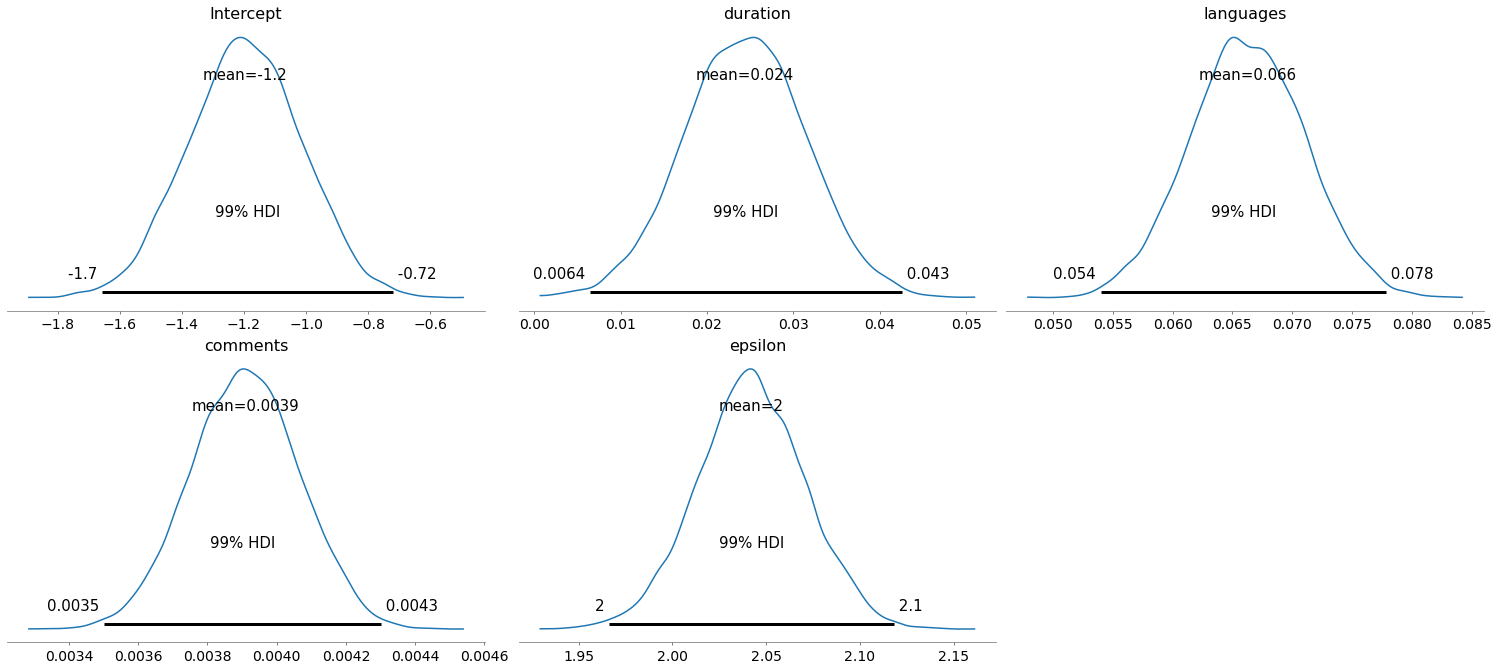

In [19]:
# Question 2: What are the chacteristics of highest density interval?
# We can use the plot_posterior function again and now we try a different highest density interval 
# probability and set it as 0.99 

az.plot_posterior(trace, hdi_prob = 0.99)

# From the graph, we see that the highest posterior density interval - interval with minimal length among all 
# credible intervals with the same probability level, all do not include 0. 
# We can also see that the highest posterior density plot is not equal-tailed, but always includes the mode(s) 
# of posterior distributions.

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'languages'}>],
       [<AxesSubplot:title={'center':'comments'}>,
        <AxesSubplot:title={'center':'epsilon'}>, <AxesSubplot:>]],
      dtype=object)

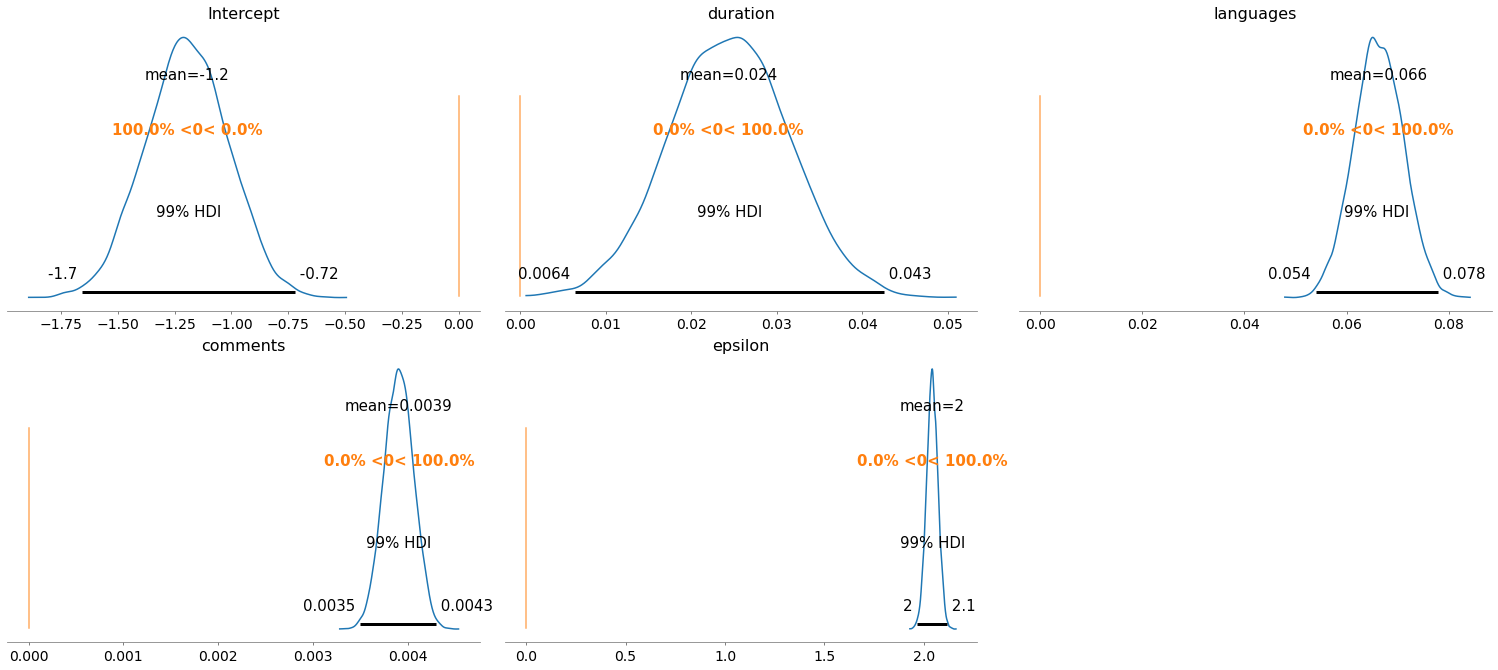

In [41]:
# To validate whether the highest posterior denstity intervals of all 5 variables step across 0, we can
# add the ref_val option and set it as 0 to add a vertical line superimposed on the highest posterior density plots.
az.plot_posterior(trace, hdi_prob = 0.99, ref_val = 0)

# All variables are valuable and effective in predicting the Ted talk views and we can see from the orange text that
# we have strong evidence that the posterior estimates indicate significant regression effect for all 5 variables
# to predict Ted talk views.

We've discussed the reference value value of testing if regression effects are different from null effect. We now understand that when we want to approximate posterior distributions of variables using finite number of samples, we need to use the highest posterior density plot to check if we have reasonable distribution. It is currently and will continue to be a fascinating way to study the uncertainty with the more densed representation of the posterior distribution.

# Video 7: Regression: Convergence and Autocorrelation

Another type of common issues where the posterior samples derived from the MCMC algorithm might be problematic are failing to converge or obtaining highly autocorrelated posterior samples. In this video, we'll look into specifically the convergence and autocorrelation issues as a crucial posterior diagnostic. 

### Question 1: In what way would we check convergence and autocorrelation in posterior diagnostic?

At a relatively late stage of posterior diagnostic, we often want to validate if we'll wrap up our study with the current model, let's say the Bayesian regression model. From the last video, we checked the effective sample size, where we know if the number of effective samples goes lower than 200 as a critical threshold, we'll raise an alert and decide to somehow rerun the model. We do that in an attempt to make sure the effective sample for all parameters are at least as large as 200 (at least in my course) so the resulting posterior estimates are more reliable. So let's assume we pass the effective sample check, the next things we need to check are a convergence diagnostic and the autocorrelation plot. 

In terms of convergence, remember we've made traceplots in the previous video that if the chains are well converged, we should see each trajectory should look similar to each other on the right panel. 

In [47]:
# No let's qualify convergence. We could revisit the pm.summary() function to generate a tabular form of 
# posterior statistics.
pm.summary(trace)

# To get the convergence statistics, we're looking at the r_hat column!
# the idea of using the R hat is to compare the variance between chains with the variance within chains.
# Ideally we should expect the R-hat equals one that shows complete convergence among all chains.
# From both PyMC3 and Stan documentations, developers decide to indicate the cases when the mixing of simulations 
# are satisfactory by setting a threshold of 1.05, although different schools of opinions exist for that threshold.

# In this course, we'll adopt the threshold of 1.05, so from now on if we see the R-hat score less than 1.05 
# (and in this example the R-hat for every parameters are 1.0) we'll determine the chains converge, 
# to a specific, reliable posterior value. 

# I personally think this threshold is quite strict but it's adopted by a majority Bayesian programming 
# developers for practical reasons. In any case, now we can confidently say that the intercept, 
# all the effects of predictors, and the error term have good convergence because the 
# r-hat value for each of them is 1.0. Cool!

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.196,0.183,-1.528,-0.850,0.003,0.002,5225.0,5258.0,1.0
duration,0.024,0.007,0.012,0.038,0.000,0.000,6317.0,6953.0,1.0
languages,0.066,0.005,0.058,0.076,0.000,0.000,5758.0,5527.0,1.0
comments,0.004,0.000,0.004,0.004,0.000,0.000,9123.0,6629.0,1.0
epsilon,2.042,0.029,1.989,2.098,0.000,0.000,9457.0,6756.0,1.0


/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>,
       <AxesSubplot:title={'center':'r_hat'}>], dtype=object)

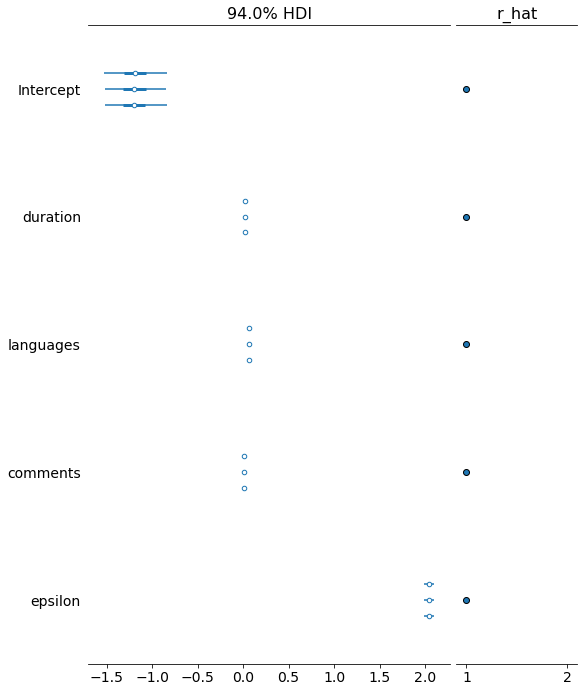

In [50]:
# We can also visually look at the convergence diagnostic R-hat by creating a forest plot and set the 
# r_hat option to True
az.plot_forest(trace, r_hat = True)

# Again, R-hat values significantly greater than one indicates that the chains are not yet converged. So in
# this case, we double-confirm that all chains converge to reliable estimates for every parameters.

# Documentation: https://arviz-devs.github.io/arviz/api/generated/arviz.rhat.html

### Question 2: What are some requirements for autocorrelation in Bayesian regression model?

Now we will check autocorrelation. So what is autocorrelation? Now we have a trajectory of posterior samples for each simulation. The autocorrelation describes the relationship where the order of sample can contribute to the posterior value.

![]('assets/autocorrelation.png')

This sneaky, increasing or decreasing patterns are called autocorrelation. The posterior values as a function of the order of samples.


### Question 3: What causes autocorrelation in Bayesian regression posterior diagnostics?

I can't exactly tell in what cases the posterior samples would guarantee to show high autocorrelation. It's good to read some books and see if there are recent findings about detecting autocorrelation. In practical sense, we should be pretty aware of adjusting the step size. If the step size we use is too large or too small, both can lead to high autocorrelation - that is, using a small step size you are likely to accept all steps which lead the chain to display random walk behaviour. On the other hand, using a large step size you are likely to reject necessary steps which lead the chain to stuck. It's hard to tell but in both cases, the autocorrelation should be high. Knowing this, we should specify at least 1000 tuning steps in PyMC3 sampling process, and this is exactly the number of tuning samples automatically assigned in PyMC3.

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept\n0'}>,
        <AxesSubplot:title={'center':'Intercept\n1'}>,
        <AxesSubplot:title={'center':'Intercept\n2'}>],
       [<AxesSubplot:title={'center':'duration\n0'}>,
        <AxesSubplot:title={'center':'duration\n1'}>,
        <AxesSubplot:title={'center':'duration\n2'}>],
       [<AxesSubplot:title={'center':'languages\n0'}>,
        <AxesSubplot:title={'center':'languages\n1'}>,
        <AxesSubplot:title={'center':'languages\n2'}>],
       [<AxesSubplot:title={'center':'comments\n0'}>,
        <AxesSubplot:title={'center':'comments\n1'}>,
        <AxesSubplot:title={'center':'comments\n2'}>],
       [<AxesSubplot:title={'center':'epsilon\n0'}>,
        <AxesSubplot:title={'center':'epsilon\n1'}>,
        <AxesSubplot:title={'center':'epsilon\n2'}>]], dtype=object)

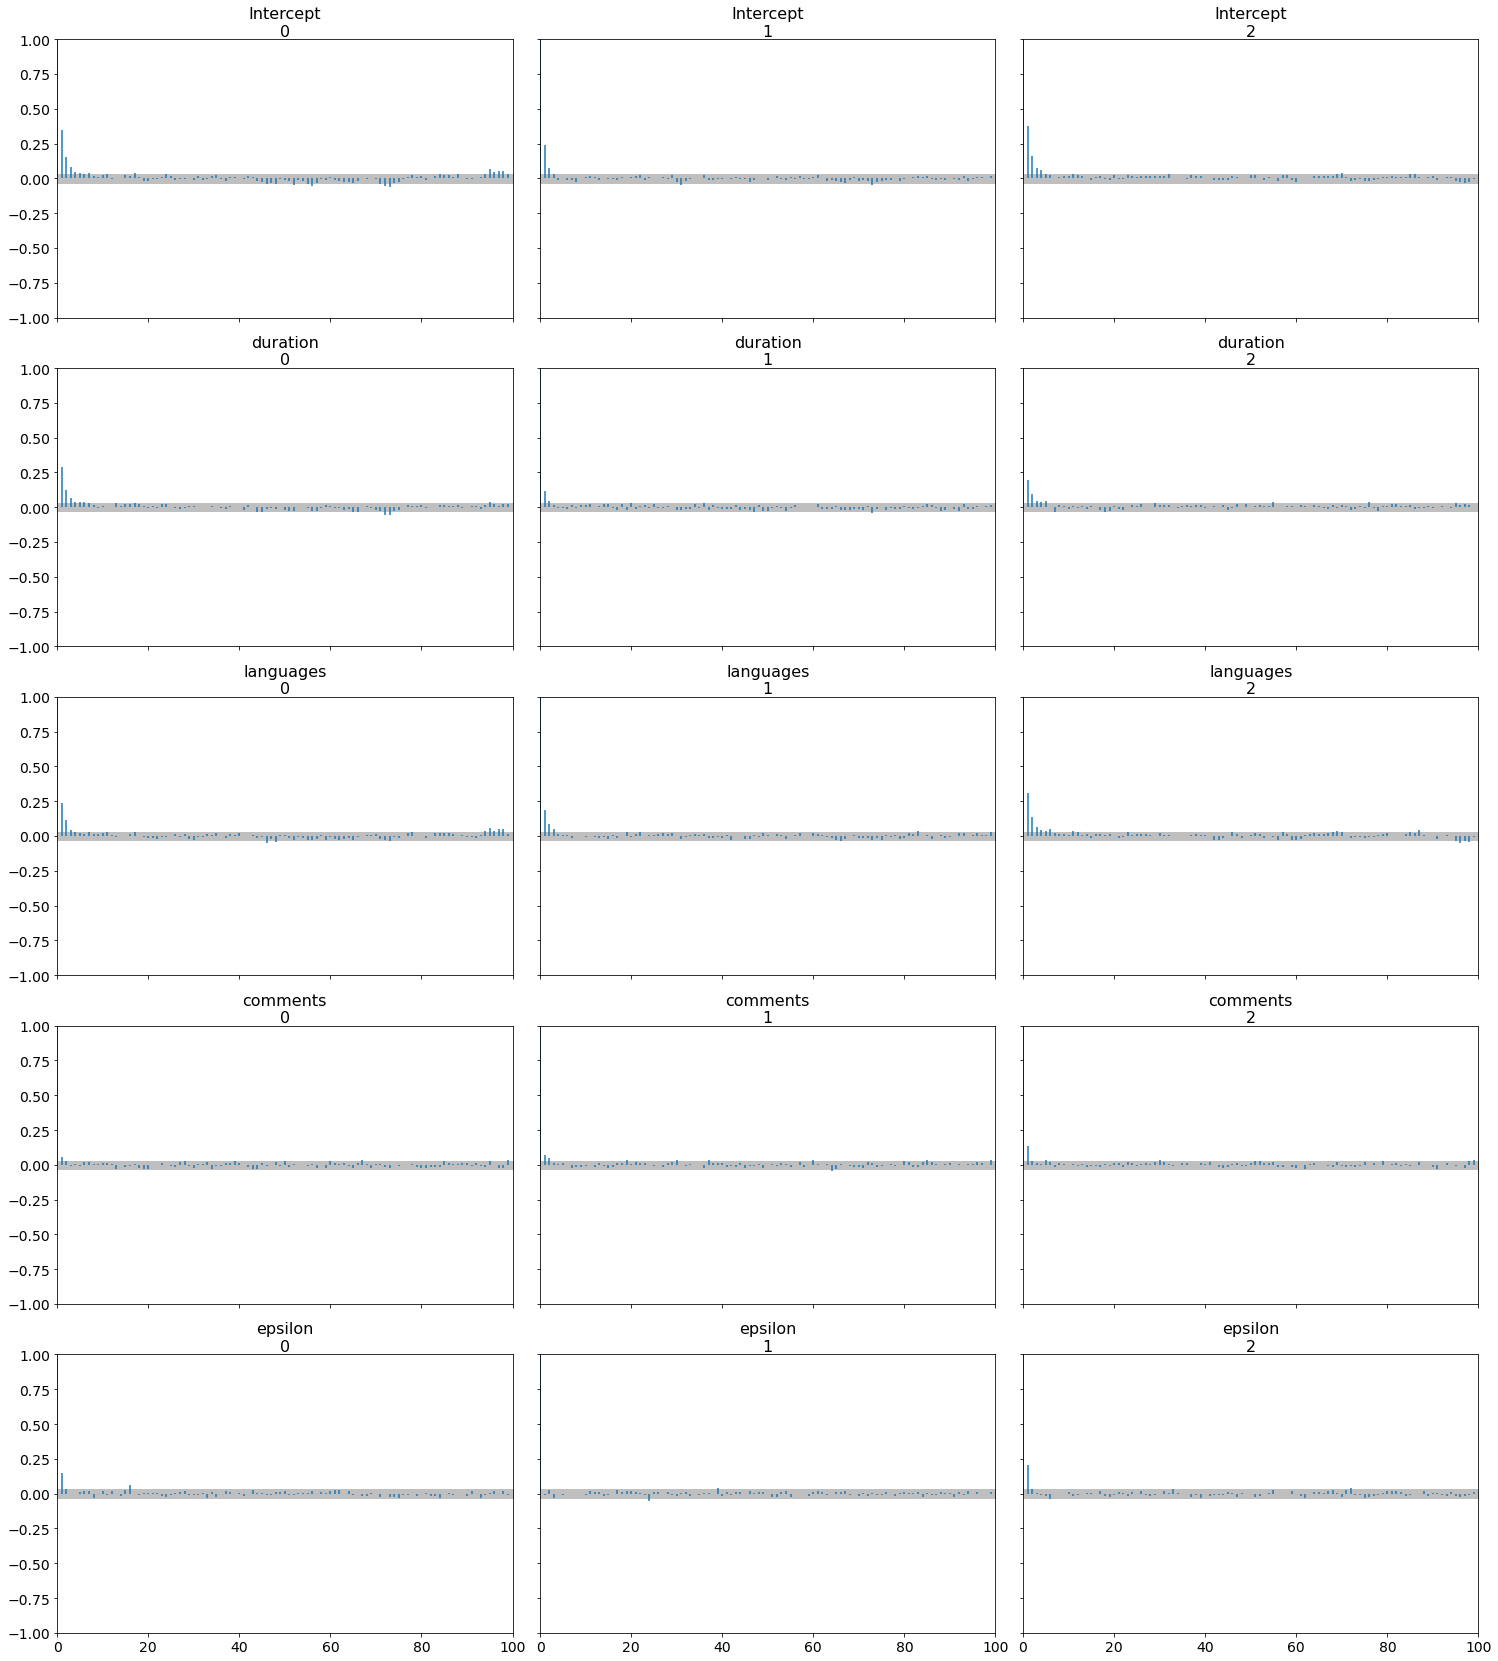

In [20]:
# We can check the autocorrelation among samples by using the plot_autocorr() function in Arviz. As the function 
# name suggests, it will generate multiple autocorrelation plots given the variables.

# Useful in particular for posteriors from MCMC samples which may display correlation. 
az.plot_autocorr(trace, combined=True)

# Cool! Now you can see a bar plot of the autocorrelation function for each trajectory of data. 
# The autocorrelation plot shows the autocorrelation function for each chain, for each variable. 
# So there are total 5 rows for intercept, regression effects duration, languages and comments, 
# and the error epsilon, and 3 columns since we've set the chains option in pm.sample as 3. 
# This makes up a total of 15 plots, but having a graph for each simulation might be too messy if
# the number of chain we specify is large due to our belief of a model is complex.

/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'languages'}>],
       [<AxesSubplot:title={'center':'comments'}>,
        <AxesSubplot:title={'center':'epsilon'}>, <AxesSubplot:>]],
      dtype=object)

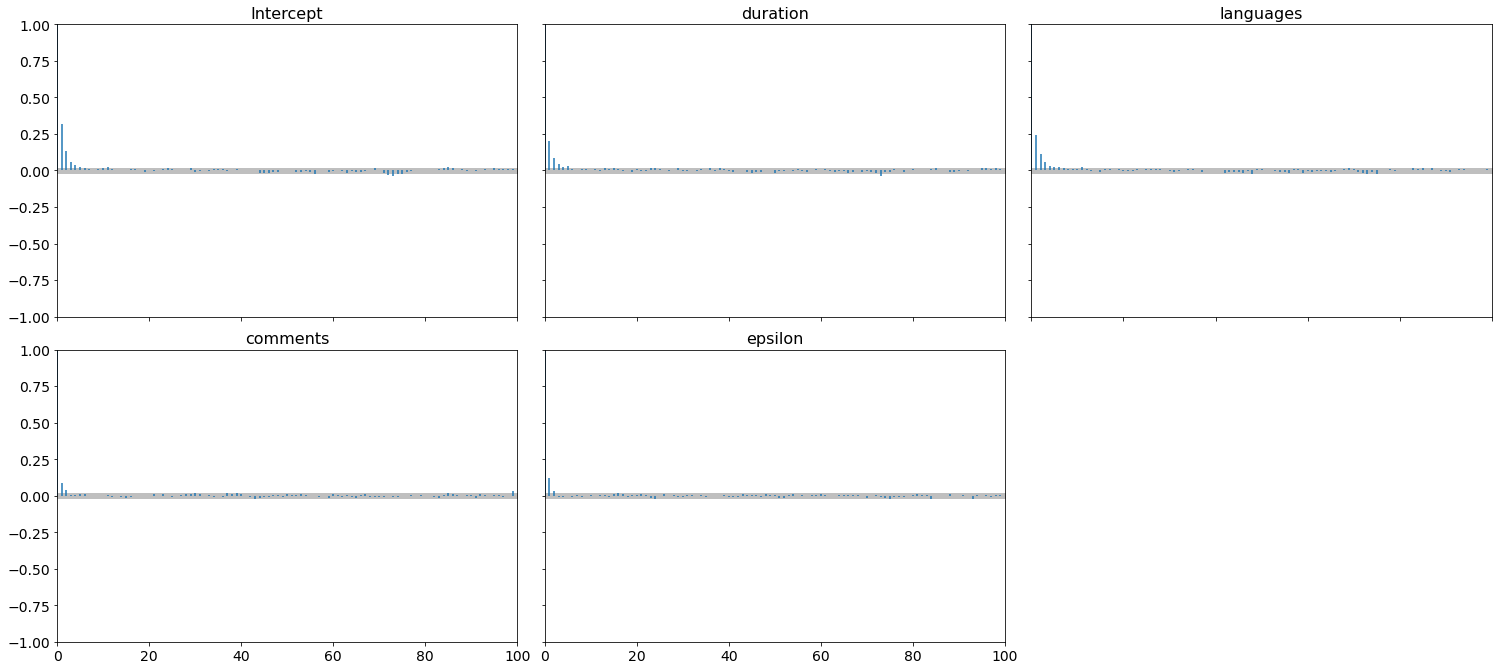

In [44]:
# We can customize the combined option and set it as True in order to combine the chains in the same 
# autocorrelation bar chart. Let's take a look.
az.plot_autocorr(trace, combined=True)

# Autocorrelation is a quantity ranges from -1 to 1. You can see that all sample autocorrelations are dwindling
# as sample trajectory goes large. Some plots show the autocorrelation of samples start at around 0.25 to 0.5 but 
# quickly decrease towards 0, which means the posterior samples we collect from the NUTS algorithm tends to 
# be approximately independent, which is important which suggests we can have reliable posterior estimates.

# We still have the max_lag option in order to user-define maximum lag in the x-axis, but here we can see
# the maximum lag of 100 by default is already reasonable and shows the unautocorrelated nature of all variables.

### Question 3: Why do convergence and autocorrelation important to check the goodness of model?


In this video, we've discussed the convergence metric and autocorrelation plot in order to finally determine if we could publish the Bayesian regression model and disemminate knowledge derived from the posterior. We find that if the r_hat statistics is close to 1, then all simulations relevant to that variable has good convergence so that the posterior estimate is reliable. Also, we summarize autocorrelation should be low in order . See you in the next video!

# Video 8: Regression: Posterior Predictive Check

After sampling regression model in PyMC3 and checking the quality of model, we'll want to see how the model can predict new observations, generalize to unobserved data. In this lecture, we wlll learn how to perform posterior predictive check to predict unseen outcomes whenever we'd like to forecast data that would not come for now, but for the future. In course 1, I developed the concept of **chaining Bayes' rule**, in which I articulated that Bayesian inference allows informative priors as useful knowledge so posterior results of a previous Bayesian model can readily be served as prior knowledge sources to inform the next predictive model.

### Question 1: What exactly does posterior predictive check mean?



Definition: Posterior predictive checks are, in simple words, "simulating replicated data under the fitted model and then comparing these to the observed data" (Gelman and Hill, 2007, p. 158). So, you use posterior predictive to "look for systematic discrepancies between real and simulated data" (Gelman et al. 2004, p. 169).

### Question 2: Why does posterior predictive check important in Bayesian analysis?

The main goal of posterior predictive track is to examine auto consistency. In normal cases the generator data and the observed data sheet looks more or less similar otherwise would say there are some problems during the modeling. So it's important for us to conduct a check to understand if there are mismatch in our bottle and understand the limitation.
Posterior predictive checks are helpful in assessing if your model gives you "valid" predictions about the reality - do they fit the observed data or not. It is a helpful phase of model building and checking - examine the goodness of fit in Bayesian analyses. It does not give you a definite answer on if your model is "ok" or if it is "better" then other model, however, it can help you to check if your model makes sense.


The “posterior predictive distribution” is either the replication of y given the model (usually
represented as yrep), or the prediction of a new and unobserved y (usually represented as y
new or y0), given the model. This is the likelihood of the replicated or predicted data, averaged
over the posterior distribution p(Θ|y)

Comparing the predictive distribution yrep to the observed data y is generally termed a
“posterior predictive check”. This type of check includes the uncertainty associated with the
estimated parameters of the model.

Although the full predictive distribution p(yrep|y) is useful for prediction, its use for model checking is questionable because of the double-use of the data. The leave-one-out cross-validation predictive density has been proposed.  This is also known as the Conditional Predictive Ordinate
or CPO. The CPO is a handy posterior predictive check because it may be used to identify outliers, influential observations, and for hypothesis testing across different non-nested models.

In [51]:
# New samples
with ted_view_regression:
    post_pred = pm.sample_posterior_predictive(trace, 
                              samples = 1000, 
                              size = len(ted_talk),
                              var_names=["Intercept", 'duration', 'languages', 'comments'])


/Users/michiganboy/opt/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [64]:
# Create y_pred variable
y_pred = az.from_pymc3(trace = trace, posterior_predictive = post_pred)
az.plot_ppc(y_pred)
# #az.plot_ppc(ppc)
# az.plot_hdi(x, ppc, hdi_prob = 0.95)

posterior predictive variable Intercept's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable duration's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable languages's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable comments's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


KeyError: 'var names: "[\'likelihood\'] are not present" in dataset'

In [ ]:
# Appendix: Coefficient of Determination


# Clean code:
with pm.Model() as ted_view_regression_r2:
    intercept = pm.Normal("Intercept", 5, sigma=3)
    beta_duration = pm.Normal('duration', mu = 0.05, sd = 0.3) 
    beta_languages = pm.Normal('languages', mu = 0.05, sd = 0.1) 
    beta_comments = pm.Normal('comments', mu = 0.05, sd = 0.1)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = intercept + beta_duration * ted_talk['duration'] + beta_languages * ted_talk['languages'] + beta_comments * ted_talk['comments'], sd = epsilon, observed = ted_talk['views']
    likelihood = pm.Normal('likelihood', mu = intercept + beta_duration * ted_talk['duration'] + beta_languages * ted_talk['languages'] + beta_comments * ted_talk['comments'], sd = epsilon, observed = ted_talk['views'])
    trace_r2 = pm.sample(4000, tune = 2000, chains = 3)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>